## Notebook 2 - Free massive non-relativistic particle:

We start by considering one non-relativistic massive particle in one spatial dimension. We want to quantize (represent on a complex-valued linear vector space) the free-space non-relativistic energy-momentum relation

$$
E= \frac{p^2}{2m}.
$$

As the physical (real) space we consider $x \in \Omega_{\rm spatial} = [0,L]$ with $L>0$. 

## Q. 2.1:

The usual procedure of quantization is to replace $E \rightarrow i \hbar \partial_t$ and (for one dimension) $p \rightarrow - i \hbar \partial_x$. Focusing on the static problem, i.e.,

$$
E \psi(x) = -\frac{\hbar^2}{2m} \partial_x^2 \psi(x)
$$

what are we still missing in the prescription? 

<details>
<summary>Hint</summary>

Remember the basic property that any operator in quantum physics should obey.

</details>

## A. 2.1:

We need to guarantee self-adjointness of the differential operator $-\tfrac{\hbar^2}{2m} \partial_x^2$. A prerequisite for self-adjointness is that the operator is symmetric, i.e.,

$$
-\frac{\hbar^2}{2m} \langle \psi | \partial_x^2 \psi \rangle = -\frac{\hbar^2}{2m} \int_{0}^{L} \psi^{*}(x) \; \partial_x^2 \; \psi(x) d x \overset{!}{=} -\frac{\hbar^2}{2m} \int_{0}^{L} \left( \partial_x^2 \; \psi(x)\right)^{*}  \psi(x) d x = -\frac{\hbar^2}{2m} \langle \partial_x^2  \psi | \psi \rangle. 
$$

Thus we need to choose appropriate boundary conditions. There are indeed infinitely many choices, but as we will explain in this lecture, the periodic boundary conditions

$$
\psi(0)= \psi(L) \; {\rm and} \; \left. \partial_x \psi(x) \right|_{x=0} = \left. \partial_x \psi(x) \right|_{x=L}
$$

are the natural ones to take. The relation of self-adjointness to symmetries will be discussed in some detail in Lec.1.2. For the reason why we do not also have similar conditions on $t$ in quantum physics.

## Q. 2.2:

Please next solve for the orthonormalized eigenfunctions of 

$$
E_l \psi_l(x) = -\frac{\hbar^2}{2m} \partial_x^2 \psi_l(x),
$$

with periodic boundary conditions on $\Omega_{\rm spatial} = [0,L]$. 

## A. 2.2:

The solutions are the plane waves

$$
\psi_{l}(x) = \frac{1}{\sqrt{L}} \exp\left(i \tfrac{2 \pi}{L} l x \right),
$$

with $l \in \mathbb{Z}_0$ and the eigenenergies

$$
E_l = \frac{\hbar^2}{2m} k_{l}^2,
$$

where $k_{l} = \tfrac{2 \pi}{L} l$ are the quantized wave numbers. A common notation that highlights the isomorphisms between Hilbert spaces, i.e., basis-set changes, that we will also use is

$$
\langle x | k_{l} \rangle = \psi_l(x).
$$

In this eigenbasis the kinetic energy operator is diagonalized, i.e.,

$$
-\frac{\hbar^2}{2m} \partial_x^2 = \sum_{l=0}^{\infty} \vert k_l \rangle \frac{\hbar^2 k_l^2}{2m} \langle k_l \vert
$$

for periodic boundary conditions. 

## Q. 2.3:

The next question is numerical. For this please choose an equidistant grid representation for $\Omega_{\rm spatial} = [0,L]$, with a spacing $\Delta x = L/N$ and $N \in \mathbb{N}$. The corresponding discretization of $-\partial_x^2$ is (to second order in $\Delta x$) is

$$
\partial_x^2 \rightarrow \frac{1}{(\Delta x)^2}
\begin{pmatrix}
-2 & 1 & 0 & 0& \dots & 0 & \blue{1} \\
1 & -2 & 1 & 0& \dots &0 & 0 \\
0 & 1 & -2 & 1& \dots &0 & 0 \\
\vdots &  &  & \ddots &  & & \vdots \\
0 & 0 & \dots & 1& -2 &1 & 0 \\
0 & 0 & \dots & 0& 1 &-2 & 1 \\
\blue{1} & 0 & \dots & 0& 0 &1 & -2 
\end{pmatrix}. 
$$

Here the $\blue{1}$'s in the corner of the matrix are due to periodic boundary conditions. What happens if you set those to zero? Write a short python routine to solve for the eigenfunctions of the discretized Hamiltonian $-\tfrac{\hbar^2}{2 m} \partial_x^2$ and compare them with the analytical solution. 

<details>
<summary>Hint (a)</summary>

Adapt your scales to not have too large/small numbers that need to be represented on your computer. That means choose units in which $\hbar = m = 1$. **The importance of choosing the right scales and the relation between the chosen base units will be highlighted throughout this school. This goes far beyond only numerical considerations.**

</details>

<details>
<summary>Hint (b)</summary>

What is the degeneracy of the eigenvalues? Does it make sense to get real wavefunction when you do numerical diagonalization? How does this fit with the planewaves solution found analytically?

</details>

[-8.16848399e-13  1.97327157e+01  1.97327157e+01]
19.739208802178716



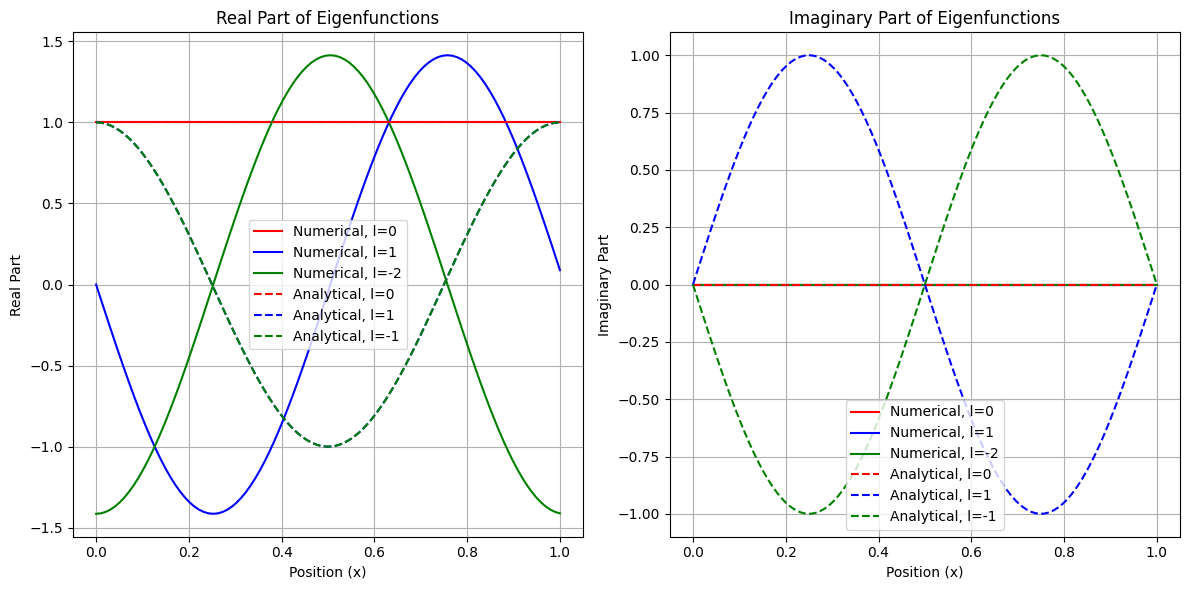

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
L = 1.0  # Length of the spatial dimension
N = 100  # Number of grid points
dx = L / N  # Grid spacing
x = np.linspace(0, L, N)  # Spatial grid

# Construct the discretized second derivative operator
A = np.zeros((N, N))
A = -2*np.eye(N, k=0) + np.eye(N, k=1) + np.eye(N, k=-1)

# Apply periodic boundary conditions
A[0, -1] = 1
A[-1, 0] = 1
A /= -2*dx**2  # Scale by 2*(dx)^2

# Solve the eigenvalue problem
eigenvalues, eigenfunctions = np.linalg.eigh(A)
# print(eigenvalues[:3])
# print((2.*np.pi*1/L)**2/2)
# print('')

# Analytical eigenfunctions
def analytical_eigenfunction(x, l):
    k_l = 2 * np.pi * l / L
    return np.exp(1j * k_l * x) / np.sqrt(L)


# Plot the numerical and analytical eigenfunctions
plt.figure(figsize=(12, 6))

# Plot real parts
plt.subplot(1, 2, 1)
color_list=  ['r', 'b', 'g']
for l in range(3):  # Plot first 3 eigenfunctions
    # The following is to be consistent with labelling
    # of analytical solution
    if l == 0:
        l_label = 0
    elif l%2 == 1:
        l_label = l // 2 + 1
    elif l%2 == 0:
        l_label = -(l //2 + 1)

    plt.plot(x, np.real(eigenfunctions[:, l])/np.sqrt(dx),
             color=color_list[l], label=f'Numerical, l={l_label}')
    # Note that for the comparison with the continous version you have to divide by
    # sqrt(dx)
for l in [0, 1, -1]:  # Plot first 3 eigenfunctions
    plt.plot(x, np.real(analytical_eigenfunction(x, l)), '--',
             color=color_list[l], label=f'Analytical, l={l}')
plt.title('Real Part of Eigenfunctions')
plt.xlabel('Position (x)')
plt.ylabel('Real Part')
plt.legend()
plt.grid(True)

# Plot imaginary parts
plt.subplot(1, 2, 2)
for l in range(3):  # Plot first 3 eigenfunctions
    if l == 0:
        l_label = 0
    elif l%2 == 1:
        l_label = l // 2 + 1
    elif l%2 == 0:
        l_label = -(l //2 + 1)
    plt.plot(x, np.imag(eigenfunctions[:, l])/np.sqrt(dx),
             color=color_list[l], label=f'Numerical, l={l_label}')
for l in [0, 1, -1]:  # Plot first 3 eigenfunctions
    plt.plot(x, np.imag(analytical_eigenfunction(x, l)), '--',
             color=color_list[l], label=f'Analytical, l={l}')
plt.title('Imaginary Part of Eigenfunctions')
plt.xlabel('Position (x)')
plt.ylabel('Imaginary Part')
plt.legend()
plt.grid(True)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()